   total_purchases  avg_cart_value  total_time_spent  product_click  \
0              7.0          129.34             52.17           18.0   
1             22.0           24.18              9.19           15.0   
2              2.0           32.18             90.69           50.0   
3             25.0           26.85             11.22           16.0   
4              7.0          125.45             34.19           30.0   

   discount_counts customer_id  
0              0.0     CM00000  
1              7.0     CM00001  
2              2.0     CM00002  
3             10.0     CM00003  
4              3.0     CM00004  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null 

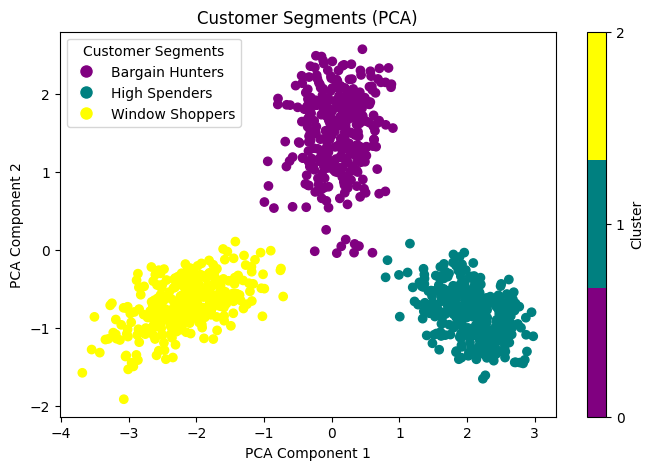

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

#cd - customer data
cd = pd.read_csv('/customer_behavior_analytcis.csv')
print(cd.head())
print(cd.info())
print(cd.describe())

print(cd.isnull().sum())
cd['total_purchases'] = cd['total_purchases'].fillna(cd['total_purchases'].median())
cd['avg_cart_value'] = cd['avg_cart_value'].fillna(cd['avg_cart_value'].median())
cd['product_click'] = cd['product_click'].fillna(cd['product_click'].median())
print(cd.isnull().sum())

cd.drop('customer_id', axis=1, inplace=True)

scaler = StandardScaler()
cd_scaled = scaler.fit_transform(cd)

kmeans = KMeans(n_clusters=3, random_state=42)
cd['cluster'] = kmeans.fit_predict(cd_scaled)

silhouette_avg = silhouette_score(cd_scaled, cd['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

pca = PCA(n_components=2)
cd_pca = pca.fit_transform(cd_scaled)

cluster_colors = ['purple', 'teal', 'yellow']
cmap = ListedColormap(cluster_colors)

plt.figure(figsize=(8,5))
scatter = plt.scatter(cd_pca[:, 0], cd_pca[:, 1], c=cd['cluster'], cmap=cmap)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (PCA)')

cluster_labels = {0: 'Bargain Hunters', 1: 'High Spenders', 2: 'Window Shoppers'}
handles = [plt.Line2D([0], [0], marker='o', color='w', label=cluster_labels[i],
                     markersize=10, markerfacecolor=cluster_colors[i]) for i in range(3)]
plt.legend(handles=handles, title="Customer Segments")
plt.colorbar(scatter, label='Cluster', ticks=[0, 1, 2])

plt.show()





